In [21]:
import pandas as pd
import joblib

In [22]:
df = pd.read_excel("data/tweet_bersih_100.xlsx")
twet = df.tweet.tolist()
label = df.label.tolist()
df.head()

,Unnamed: 0,tweet,label
0,0,buka visi misi begitu pukau sehingga buat pres...,positive
1,1,lebih baik pakai teknologi lama kaya negara in...,positive
2,2,kok arguing without crying,positive
3,3,jalan politik politik satu bukan politik pecah...,positive
4,4,juga fans lihat tampil serang hahaha,negative


positive    500
negative    500
Name: label, dtype: int64


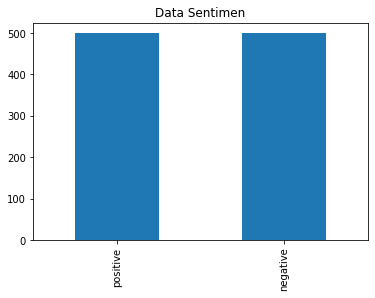

In [23]:
pd.value_counts(df['label']).plot.bar(title='Data Sentimen')
print(pd.value_counts(df['label']))

# Pembagian data & pemodelan

In [24]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn import svm

In [25]:
# clf = svm.SVC(kernel = "rbf", C = 1, gamma=1)
# clf.fit(X, y)  

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = twet
vectorizer = TfidfVectorizer()
save = vectorizer.fit(corpus)
joblib.dump(save,"model/tdidf.w")
X = vectorizer.fit_transform(corpus)

In [27]:
k = 10
y = np.array(label)
kf = KFold(n_splits=k)
kf.get_n_splits(X)
# print(kf)
C_list     = np.arange(0.1, 2+0.1, 0.1)
gamma_list = np.arange(0.1, 2+0.1, 0.1)

C_list_ = list()
gamma_list_ = list()
rerata = list()
ix=1
for C in C_list:
    for gamma in gamma_list:
        C_list_.append(C)
        gamma_list_.append(gamma)
        
        clf = svm.SVC(kernel = "rbf", C = C, gamma=gamma)
        sc_10 = list()
        for train_index, test_index in kf.split(X):
        #     print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            clf.fit(X_train, y_train)
    #         clf.fit(X, y)
            sc = clf.score(X_test, y_test)
            sc_10.append(sc)
            
        if ix%100==0:
            print(ix)
        else:
            print(".", end="")
        ix+=1
            
        rerata.append(sum(sc_10)/k)
dict_ = {
    "C":C_list_,
    "gamma":gamma_list_,
    "score":rerata
}
df_hasil = pd.DataFrame.from_dict(dict_)
sorted_ = df_hasil.sort_values("score", axis = 0, ascending = False)
sorted_.head(10)

...................................................................................................100
...................................................................................................200
...................................................................................................300
...................................................................................................400


,C,gamma,score
267,1.4,0.8,0.776
287,1.5,0.8,0.775
266,1.4,0.7,0.775
285,1.5,0.6,0.775
250,1.3,1.1,0.775
247,1.3,0.8,0.775
307,1.6,0.8,0.774
284,1.5,0.5,0.774
286,1.5,0.7,0.774
383,2.0,0.4,0.774


In [32]:
len(C_list_)

400

In [33]:
sorted_.gamma.tolist()[0]

0.8

In [34]:
clf = clf = svm.SVC(kernel = "rbf", C = sorted_.C.tolist()[0], gamma=sorted_.gamma.tolist()[0])
save = clf.fit(X_train, y_train)
joblib.dump(save,"model/svm.m")

['model/svm.m']

In [35]:
save.score(X, y) #0.9761668321747765

0.972

In [19]:
x = save.predict(X)

In [20]:
ixx = 0
labelA = list()
labelP= list()

for i, j in zip(label, x):
    if i !=j:
        print(ixx)
        print(j)
        print("label asli",i)
        print(twet[ixx])
        print()
    ixx+=1

627
positive
label asli negative
kalau mandat akan bersih kuat lembaga perintah akan hilang korupsi indonesia

642
positive
label asli negative
perintah dil digital layan sangat perlu

909
negative
label asli positive
lawan tak daya lawan mantul euy

910
positive
label asli negative
presiden ajak keluarga makan siang rumah makan bilang jalan sabang jakarta pusat sayang dua putra hadir

914
positive
label asli negative
cek fakta cek fakta sebut dana tahan ri kecil singapura 30 gdp https t co hv6u1urlj5

919
positive
label asli negative
beda negara debat maaf keras tengah banyumas

932
positive
label asli negative
malam minggu duduk depan layar tv nonton debat empat capres semangat pak 01dilanjutkan

934
positive
label asli negative
lah situ nyinyir apa gak balik aki aki apa nenek peot capresnya jadul

938
negative
label asli positive
tim ses 02 yg lapar haus kelak kau jabat ingat jd presoden bkn krn kau bkn krn kalian

940
negative
label asli positive
rip warkop tertawa tertawa larang l